In [46]:
from sklearn import datasets
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve
from matplotlib import pyplot as plt

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.preprocessing import label_binarize


In [40]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y0 = y == 0
y1 = y == 1
y2 = y == 2

In [28]:
y0 = label_binarize(y, classes=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y0, test_size=0.3, random_state=0)
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=0)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

{0: 1.0, 1: 0.8765432098765432, 'micro': 0.9684873949579831}


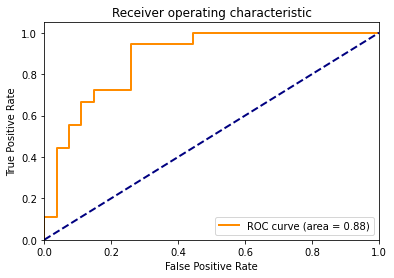

In [36]:
plt.figure()
lw = 2
print(roc_auc)
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=0)
classifier = GaussianNB().fit(X_train, y_train)
print(classifier.score(X_test,y_test))

1.0


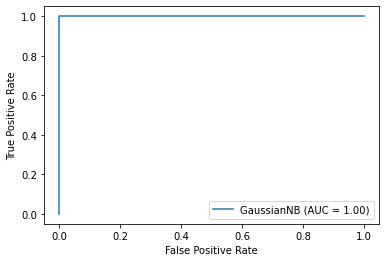

In [49]:
plot_roc_curve(classifier, X_test, y_test)
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.3, random_state=0)
classifier = LogisticRegression().fit(X_train, y_train)
print(classifier.score(X_test,y_test))

0.9777777777777777


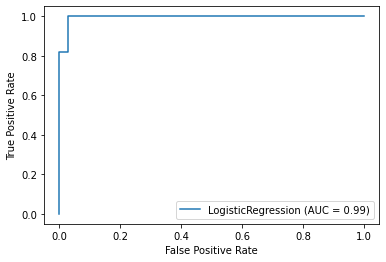

In [51]:
plot_roc_curve(classifier, X_test, y_test)
plt.show()